## Загрузка данных

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('credit_card_default_analysis.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 1. LIMIT_BAL

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

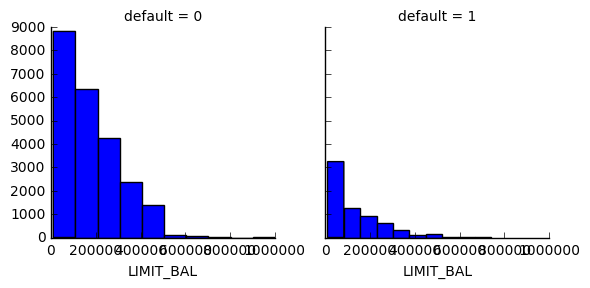

In [6]:
g = sns.FacetGrid(data, col = "default")
g = g.map(plt.hist, "LIMIT_BAL")

#### а) определим доверительные интервалы для медиан выборок с помощью бутстрепа

In [7]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [8]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [10]:
import numpy as np
np.random.seed(0)
nondef_bal = data[data.default==0].LIMIT_BAL.values
def_bal = data[data.default==1].LIMIT_BAL.values

nondef_medians = map(np.median, get_bootstrap_samples(nondef_bal, 1000))
def_medians = map(np.median, get_bootstrap_samples(def_bal, 1000))

print "95% доверительный интервал для размера лимита для людей, вернувших кредит:",  stat_intervals(nondef_medians, 0.05)
print "95% доверительный интервал для размера лимита для людей, не вернувших кредит:",  stat_intervals(def_medians, 0.05)

95% доверительный интервал для размера лимита для людей, вернувших кредит: [ 150000.  150000.]
95% доверительный интервал для размера лимита для людей, не вернувших кредит: [ 80000.  90000.]


#### Вывод: 95% интервалы не пересекаются, значит медианы значимо отличаются

#### б) проверим гипотезу о равенстве распределений с помощью перестановочного критерия

In [11]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [12]:
def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [13]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [14]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [198]:
print "p-value: %f" % permutation_test(nondef_bal, def_bal, max_permutations = 1000, alternative='greater')

p-value: 0.001000


#### Вывод: нулевая гипотеза о равенстве распределений отвергается на уровне 0.05 в пользу односторонней альтернативы

#### Полученные результаты являются практически значимыми, посольку размер эффекта достаточно велик: медианы выборок отличаются почти в 2 раза.

## 2. SEX

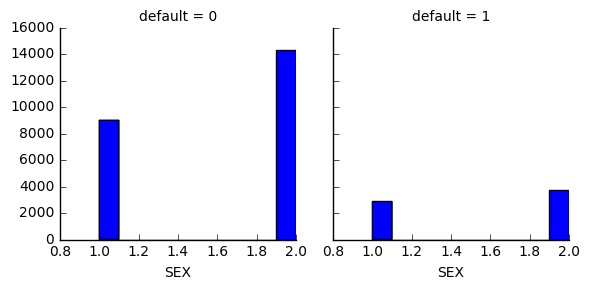

In [16]:
g = sns.FacetGrid(data, col = "default")
g = g.map(plt.hist, "SEX")

#### посчитаем доли мужчин в каждой категории и проверим, различаются ли они значимо

In [29]:
data_def = data[data.default==1]
data_nondef = data[data.default==0]
p_men_def = float(data_def[data_def.SEX==1].shape[0])/data_def.shape[0]
p_men_nondef = float(data_nondef[data_nondef.SEX==1].shape[0])/data_nondef.shape[0]
print "Доля мужчин среди людей, не вернувших вредит: %f" % p_men_def
print "Доля мужчин среди людей, вернувших вредит: %f" % p_men_nondef

Доля мужчин среди людей, не вернувших вредит: 0.432942
Доля мужчин среди людей, вернувших вредит: 0.385850


#### а) посчитаем интервальные оценки долей медотом Уилсона

In [199]:
from statsmodels.stats.proportion import proportion_confint
ci_men_def = proportion_confint(data_def[data_def.SEX==1].shape[0], data_def.shape[0], method = 'wilson')
ci_men_nondef = proportion_confint(data_nondef[data_nondef.SEX==1].shape[0], data_nondef.shape[0], method = 'wilson')
print "95%% доверительный интервал для доли мужчин среди людей, не вернувших кредит: [%f, %f]" % ci_men_def
print "95%% доверительный интервал для доли мужчин среди людей, вернувших кредит: [%f, %f]" % ci_men_nondef

95% доверительный интервал для доли мужчин среди людей, не вернувших кредит: [0.421062, 0.444898]
95% доверительный интервал для доли мужчин среди людей, вернувших кредит: [0.379627, 0.392110]


#### Вывод: интервальные оценки не перескаются, следовательно доли значимо отличаются

#### б) посчитаем z-критерий для разности долей двух несвязанных выборок

In [45]:
n1 = data_def.shape[0]
n2 = data_nondef.shape[0]
    
P = float(p_men_def*n1 + p_men_nondef*n2) / (n1 + n2)
    
z = (p_men_def - p_men_nondef) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [48]:
import scipy
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [200]:
print "p-value: %.15f" % proportions_diff_z_test(z, 'greater')

p-value: 0.000000000002236


#### Вывод: гипотеза о равенстве долей отвергается в пользу односторонней альтернативы на уровне 0.05

## 3. EDUCATION

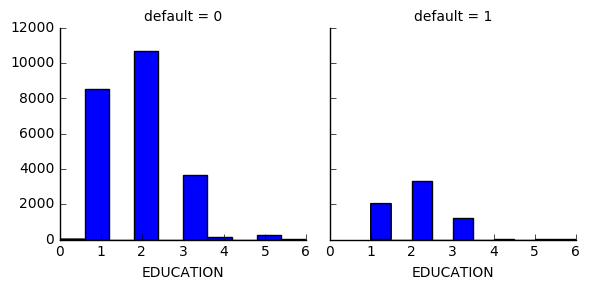

In [56]:
g = sns.FacetGrid(data, col = "default")
g = g.map(plt.hist, "EDUCATION")

#### проверим гипотезу, что образование не влияет на то, вернет ли человек долг, с помощью критерия хи-квадрат

In [141]:
f_obs = pd.pivot_table(data, values = 'ID', index='default', columns = 'EDUCATION', aggfunc='count', fill_value=0, margins = True)
f_obs

EDUCATION,0,1,2,3,4,5,6,All
default,,,,,,,,
0,14.0,8549.0,10700.0,3680.0,116.0,262.0,43.0,23364.0
1,0.0,2036.0,3330.0,1237.0,7.0,18.0,8.0,6636.0
All,14.0,10585.0,14030.0,4917.0,123.0,280.0,51.0,30000.0


если нулевая гипотеза верна, ожидаемое количество человек, вернувших и не вернувщих кредит, внутри каждого вида образования будут образовывать ту же пропорцию, что получается в общем без учета образования

In [142]:
p = 23364./30000
ed_all = f_obs.iloc[-1].drop('All').values
f_obs = f_obs.iloc[:-1].drop("All", axis=1).values.astype(int)
f_exp = np.array([np.round(ed_all*p), np.round(ed_all*(1-p))], dtype=int)
print "Обсервационные данные:"
print f_obs
print "Ожидаемые данные:"
print f_exp

Обсервационные данные:
[[   14  8549 10700  3680   116   262    43]
 [    0  2036  3330  1237     7    18     8]]
Ожидаемые данные:
[[   11  8244 10927  3829    96   218    40]
 [    3  2341  3103  1088    27    62    11]]


In [144]:
from scipy.stats import chisquare
chisquare(f_obs, f_exp, axis=None)

Power_divergenceResult(statistic=162.49602939854691, pvalue=6.1549276406694072e-28)

#### Вывод: гипотеза о том, что образование не влияет на возврат кредита, отвергается на уровне 0.05.

Отобразим таблицу разностей между наблюдаемым и ожидаемым количеством человек, не вернувших кредит.

In [159]:
df = pd.DataFrame((f_obs-f_exp)[1, :], columns = ["default_1"], index = map(lambda x: "EDUCATION_"+str(x), range(7)))
df

,default_1
EDUCATION_0,-3
EDUCATION_1,-305
EDUCATION_2,227
EDUCATION_3,149
EDUCATION_4,-20
EDUCATION_5,-44
EDUCATION_6,-3


для наглядности приведем данные к одному масштабу, отобразив относительную разницу (как долю от ожидаемого значения)

In [165]:
df = pd.DataFrame((f_obs-f_exp)[1, :]/f_exp[1, :].astype(float), columns = ["default_1"], index = map(lambda x: "EDUCATION_"+str(x), range(7)))
df

,default_1
EDUCATION_0,-1.000000
EDUCATION_1,-0.130286
EDUCATION_2,0.073155
EDUCATION_3,0.136949
EDUCATION_4,-0.740741
EDUCATION_5,-0.709677
EDUCATION_6,-0.272727


Посчитаем пропорции вернувших кредит внутри категорий образования

In [163]:
f_obs[0,:]/f_obs.sum(axis=0).astype(float)

array([ 1.        ,  0.80765234,  0.76265146,  0.74842384,  0.94308943,
        0.93571429,  0.84313725])

#### Таким образом, люди, имеющие доктора (0), всегда возвращали долг, но их в выборке немного.  Люди, имеющие начальное образование (4) или прочее (5) также часто возвращали кредит. С другой стороны люди, имеющие бакалава (1) или выпускника школы (2), чаще других не возвращали кредиты.

## 4. MARRIAGE

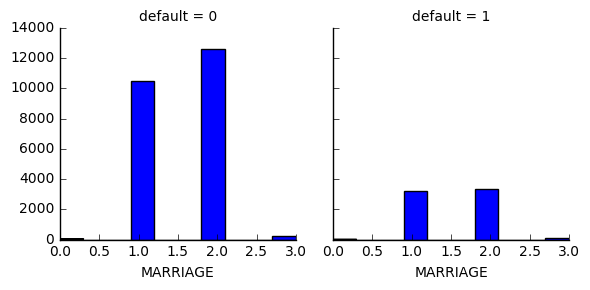

In [167]:
g = sns.FacetGrid(data, col = "default")
g = g.map(plt.hist, "MARRIAGE")

#### оценим связь семейного статуса с индикатором дефолта с помощью коэффициента Крамера

In [173]:
tb_mar = pd.pivot_table(data, values="ID", index="default", columns="MARRIAGE", aggfunc='count')
tb_mar

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


In [185]:
from scipy.stats import chi2_contingency
res = chi2_contingency(tb_mar)
vc = np.sqrt(res[0]/np.sum(tb_mar.sum()))
print "Коэффициент Крамера: %f" % vc

Коэффициент Крамера: 0.034478


#### Коэффициент Крамера близок к 0, следовательно взаимосвязь очень слабая.

## 5. AGE

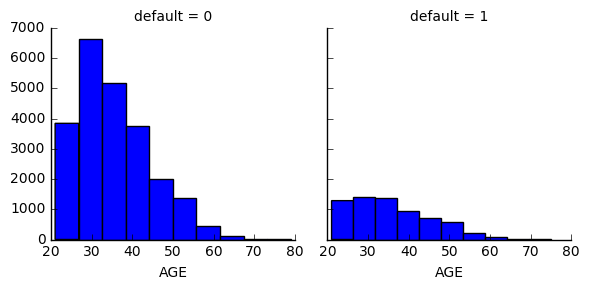

In [186]:
g = sns.FacetGrid(data, col = "default")
g = g.map(plt.hist, "AGE")

#### а) посчитаем интервальную оценку для разности медиан возрастов двух групп с помощью бутстрепа

In [194]:
nondef_age = data[data.default==0].AGE.values
def_age = data[data.default==1].AGE.values

nondef_medians = np.array(map(np.median, get_bootstrap_samples(nondef_age, 1000)))
def_medians = np.array(map(np.median, get_bootstrap_samples(def_age, 1000)))

print "95% доверительный интервал для разности медиан возраста людей, вернувших и не вернувших кредит:",  stat_intervals(nondef_medians - def_medians, 0.05)


95% доверительный интервал для разности медиан возраста людей, вернувших и не вернувших кредит: [-1.  0.]


#### Вывод: поскольку интервал включает 0, мы не можем отбросить гипотезу о том, что медианы одинаковы.

#### б) проверим гипотезу о равенстве распределений с помощью перестановочного критерия

In [196]:
print "p-value: %f" % permutation_test(nondef_age, def_age, max_permutations = 1000)

p-value: 0.016000


#### Вывод: нулевая гипотеза о равенстве распределений отвергается на уровне 0.05, но не отвергается на уровне 0.01.

#### Практической значимости результаты не имеют, поскольку медианы возврастов отличаются очень мало.